# Setup Using Jupyter Notebook and Qiskit

I was finally able to fix the PATH issues after uninstalling Anaconda.

The setup guide that I used is the following:

https://github.com/microsoft/qsharp/wiki/Working-with-Jupyter-Notebooks

In [5]:
%pip install qsharp-lang

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for qsharp-lang from https://files.pythonhosted.org/packages/5b/74/7a03e58a0632e9a3de478402b9c2491fbaec71781aecd19a711f2f405a2e/qsharp_lang-1.0.16.dev0-cp37-abi3-macosx_10_9_x86_64.macosx_11_0_arm64.macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import qsharp

In [7]:
%%qsharp

// This makes the DumpMachine() function available.
open Microsoft.Quantum.Diagnostics;

operation RandomBit() : Result {
    // Qubits are only accesible for the duration of the scope where they
    // are allocated and are automatically released at the end of the scope.
    use qubit = Qubit();

    // Set the qubit in superposition by applying a Hadamard transformation.
    H(qubit);

    DumpMachine();

    // Measure the qubit. There is a 50% probability of measuring either
    // `Zero` or `One`.
    let result = M(qubit);

    Message($"The result of the measurement is {result}.");

    // Reset the qubit so it can be safely released.
    Reset(qubit);
    return result;
}

// Call the operation we defined above.
RandomBit();

STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖

The result of the measurement is Zero.

In [8]:
r = qsharp.eval("RandomBit()")

if r == qsharp.Result.One:
    i = 1
else:
    i = 0

print(f"Python: Got integer {i}!")

STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
Python: Got integer 1!


In [9]:
results = qsharp.run("RandomBit()", shots=1000)

STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is Zero.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is Zero.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is Zero.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is Zero.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is Zero.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of the measurement is One.
STATE:
|0⟩: 0.7071+0.0000𝑖
|1⟩: 0.7071+0.0000𝑖
The result of

In [19]:
print(type(results))

<class 'list'>


In [10]:
%pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


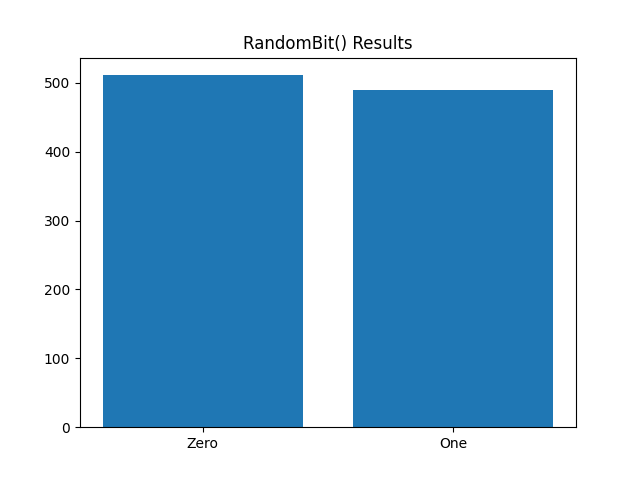

In [11]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Sort the results so that the histogram labels appear in the correct order
results.sort()
# Count the number of times each result appears
counts = Counter(results)

(values, counts) = counts.keys(), counts.values()
xlabels = np.arange(len(counts))
plt.title("RandomBit() Results")
plt.bar(xlabels, counts)
plt.xticks(xlabels, values)
plt.show()

In [12]:
qsharp.init(target_profile=qsharp.TargetProfile.Base)

In [13]:
%%qsharp

operation Random() : Result {
    use q = Qubit();
    H(q);
    let result = M(q);
    Reset(q);
    return result
}

operation RandomNBits(N: Int): Result[] {
    mutable results = [];
    for i in 0 .. N - 1 {
        let r = Random();
        set results += [r];
    }
    return results
}

In [14]:
%pip install azure-quantum

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for azure-quantum from https://files.pythonhosted.org/packages/cb/b7/9e4927f3dc763859ee9bd32e94221819ccedb2f1abae97bf99ed5d32cfca/azure_quantum-0.28.302812-py3-none-any.whl.metadata
  Using cached azure_quantum-0.28.302812-py3-none-any.whl.metadata (7.4 kB)
Using cached azure_quantum-0.28.302812-py3-none-any.whl (180 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
subscription_id = '0f1dbd45-340d-49eb-8803-a155ebc37bea'
resource_group = 'AzureQuantum'
workspace_name = 'my-first-workspace'
location = 'japanwest'

In [20]:
import azure.quantum

operation = qsharp.compile("RandomNBits(4)")

workspace = azure.quantum.Workspace(
    subscription_id=subscription_id,
    resource_group=resource_group,
    name=workspace_name,
    location=location,
)
target = workspace.get_targets("rigetti.sim.qvm")
job = target.submit(operation, "my-azure-quantum-job", input_params={ "count": 100 })
qvm_result = job.get_results()

........

In [21]:
print(type(qvm_result))

<class 'dict'>


In [27]:
job.get_status()

AttributeError: 'Job' object has no attribute 'get_status'

In [24]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Sort the results so that the histogram labels appear in the correct order
qvm_result.sort()
# Count the number of times each result appears
counts = Counter(qvm_result)

(values, counts) = counts.keys(), counts.values()
xlabels = np.arange(len(counts))
plt.title("RandomBit() Results")
plt.bar(xlabels, counts)
plt.xticks(xlabels, values)
plt.show()

AttributeError: 'dict' object has no attribute 'sort'